In [1]:
import sys
import re
from struct import *
import numpy as np
from matplotlib import pyplot as plt
import cv2


def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
    return img

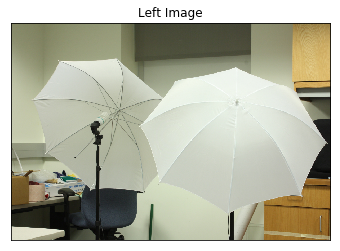

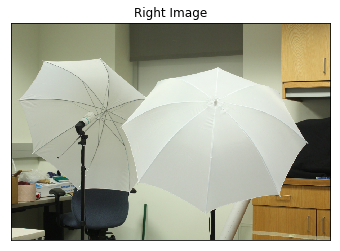

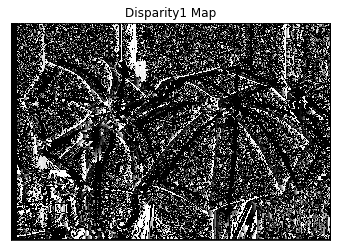

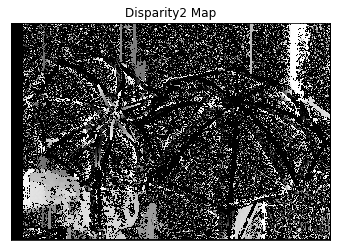

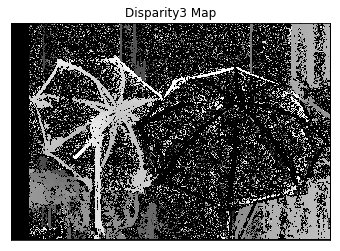

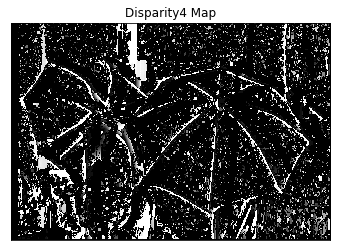

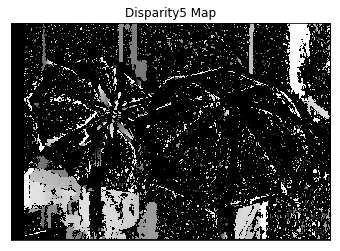

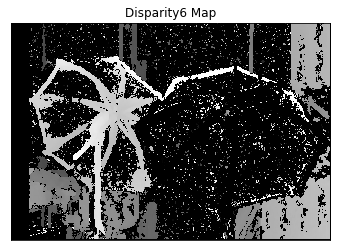

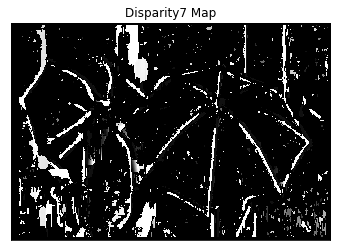

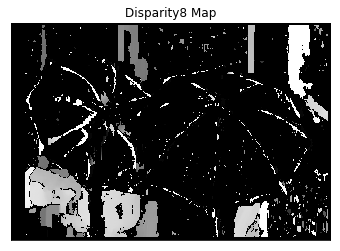

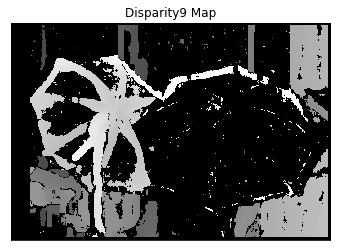

In [5]:
#compute depth map
# read the image 
imgL = cv2.imread("0.png");
imgR = cv2.imread("1.png");

# read the pfm 
imgp = read_pfm('disp0.pfm')

# replace all Inf depth with 0 <==> undefined depth
imgp[imgp==np.inf] = 0

#resize 
imgp = cv2.resize(imgp, None, fx=0.3, fy=0.3)
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)

# convert into gray mode
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

# compute disparity map
stereo1 = cv2.StereoBM_create(numDisparities=16, blockSize=5)
disparity1 = stereo1.compute(imgL_gray, imgR_gray)


stereo2 = cv2.StereoBM_create(numDisparities=32, blockSize=5)
disparity2 = stereo2.compute(imgL_gray, imgR_gray)


stereo3 = cv2.StereoBM_create(numDisparities=48, blockSize=5)
disparity3 = stereo3.compute(imgL_gray, imgR_gray)


stereo4 = cv2.StereoBM_create(numDisparities=16, blockSize=9)
disparity4 = stereo4.compute(imgL_gray, imgR_gray)


stereo5 = cv2.StereoBM_create(numDisparities=32, blockSize=9)
disparity5 = stereo5.compute(imgL_gray, imgR_gray)


stereo6 = cv2.StereoBM_create(numDisparities=48, blockSize=9)
disparity6 = stereo6.compute(imgL_gray, imgR_gray)


stereo7 = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity7 = stereo7.compute(imgL_gray, imgR_gray)


stereo8 = cv2.StereoBM_create(numDisparities=32, blockSize=15)
disparity8 = stereo8.compute(imgL_gray, imgR_gray)

stereo9 = cv2.StereoBM_create(numDisparities=48, blockSize=15)
disparity9 = stereo9.compute(imgL_gray, imgR_gray) 


# display images
#plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title("Left Image"),plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title("Right Image"), plt.xticks([]), plt.yticks([])

plt.show()
plt.imshow(disparity1, cmap="gray")

plt.title("Disparity1 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(disparity2, cmap="gray")
plt.title("Disparity2 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(disparity3, cmap="gray")
plt.title("Disparity3 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(disparity4, cmap="gray")
plt.title("Disparity4 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(disparity5, cmap="gray")
plt.title("Disparity5 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(disparity6, cmap="gray")
plt.title("Disparity6 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(disparity7, cmap="gray")
plt.title("Disparity7 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(disparity8, cmap="gray")
plt.title("Disparity8 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(disparity9, cmap="gray")
plt.title("Disparity9 Map"), plt.xticks([]), plt.yticks([])
plt.show()

2.1.2For each depth-map, compute the pixel-wise squared difference error with respect to the ground-truth. (2 points)

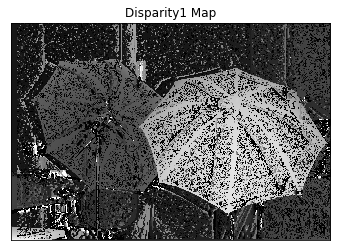

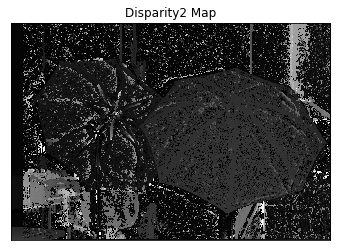

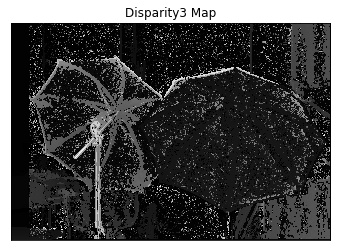

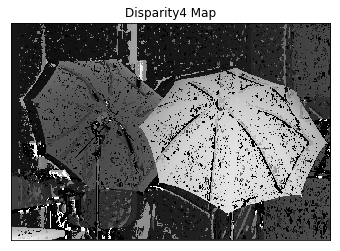

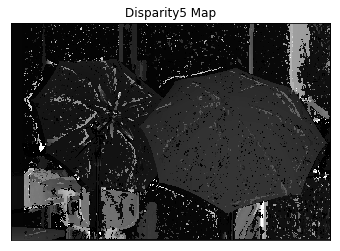

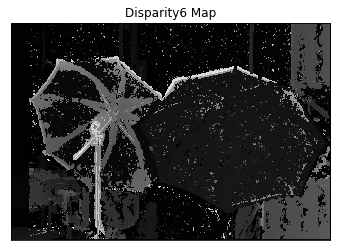

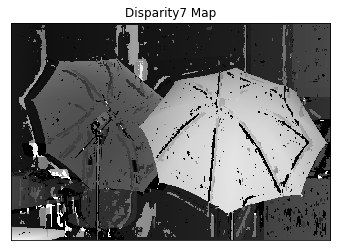

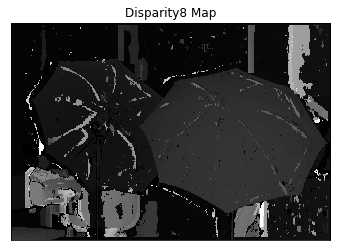

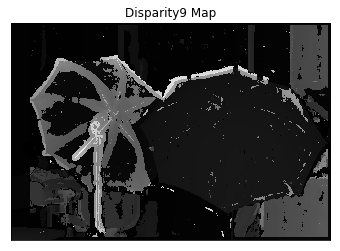

In [6]:
# 
sqd1 = (imgp - disparity1)**2
sqd2 = (imgp - disparity2)**2
sqd3 = (imgp - disparity3)**2
sqd4 = (imgp - disparity4)**2
sqd5 = (imgp - disparity5)**2
sqd6 = (imgp - disparity6)**2
sqd7 = (imgp - disparity7)**2
sqd8 = (imgp - disparity8)**2
sqd9 = (imgp - disparity9)**2

plt.show()
plt.imshow(sqd1, cmap="gray")

plt.title("Disparity1 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sqd2, cmap="gray")
plt.title("Disparity2 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sqd3, cmap="gray")
plt.title("Disparity3 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sqd4, cmap="gray")
plt.title("Disparity4 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sqd5, cmap="gray")
plt.title("Disparity5 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sqd6, cmap="gray")
plt.title("Disparity6 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sqd7, cmap="gray")
plt.title("Disparity7 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sqd8, cmap="gray")
plt.title("Disparity8 Map"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sqd9, cmap="gray")
plt.title("Disparity9 Map"), plt.xticks([]), plt.yticks([])
plt.show()


2.1.3 Comment on the error_maps for each combination of parameters. Specifically, mention the effects of varying the parameters on the error in the region of high/low texture, edge, large/small depths

Bigger blocksize helps us lower the noise arund the edges in most cases. Even though it can help reduce the noise of the image, it cannot deifferentiating the depth in the image. i.e. it doesnot give us details on the image, points of the textures.
The effects of disparity really depends on the image we are using. The images I am using has a little differnce between the right and left image. The range of disparities of my image is not so big. Disparities helps defining the depth and can truly focus on the deatils.

In terms of the goodness of error maps, disparities plays a more vital role than blocksize. 